## GReaT Example with Iris Dataset

In [34]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [16]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [17]:
from utils import set_logging_level
from be_great import GReaT


In [18]:
import matplotlib.pyplot as plt

In [45]:
import subprocess
import os

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [46]:
logger = set_logging_level(logging.INFO)

### Load Data

In [47]:
data = pd.read_excel('/root/autodl-tmp/be_great-main/few_data.xlsx')
data.head()

,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90,POR_data
0,1,299.852,28.003,2.413,22.521,89.074,180.003,3.713,2.813,2.474,3.060,3.060,0.00001
1,1,358.319,36.019,2.332,26.886,88.415,180.122,2.551,4.239,1.630,4.206,4.206,0.00001
2,0,345.092,22.082,2.217,21.742,61.294,142.670,2.030,3.717,2.010,4.889,4.889,24.50000
3,1,363.517,48.564,2.299,23.598,67.300,169.452,2.282,3.839,1.158,2.833,2.833,0.00001
4,1,345.041,31.863,2.314,24.378,80.492,178.855,2.427,2.128,1.420,3.262,3.262,0.00001


In [7]:
data.columns = ["sepal length", "sepal width", "petal length", "petal width", "target"]

### Create GReaT Model

In [48]:

great = GReaT("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=1000,                   # Number of epochs to train
              save_steps=200,               # Save model weights every x steps
              logging_steps=500,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_well", # Name of the directory where all intermediate steps are saved
              batch_size=16,                 # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
             )

### Start Training

In [49]:
trainer = great.fit(data)

2025-04-12 17:11:40,341 - INFO - Convert data into HuggingFace dataset object... (great.py:153)
2025-04-12 17:11:40,341 - INFO - Convert data into HuggingFace dataset object... (great.py:153)
2025-04-12 17:11:40,341 - INFO - Convert data into HuggingFace dataset object... (great.py:153)
2025-04-12 17:11:40,341 - INFO - Convert data into HuggingFace dataset object... (great.py:153)
2025-04-12 17:11:40,354 - INFO - Create GReaT Trainer... (great.py:158)
2025-04-12 17:11:40,354 - INFO - Create GReaT Trainer... (great.py:158)
2025-04-12 17:11:40,354 - INFO - Create GReaT Trainer... (great.py:158)
2025-04-12 17:11:40,354 - INFO - Create GReaT Trainer... (great.py:158)
/root/autodl-tmp/be_great-main/be_great/great.py:165: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `GReaTTrainer.__init__`. Use `processing_class` instead.
  great_trainer = GReaTTrainer(
2025-04-12 17:11:40,364 - INFO - Start training... (great.py:174)
2025-04-12 17:11:40,364 - INFO - Star

Step,Training Loss
500,1.211600
1000,0.716100
1500,0.501100
2000,0.406600
2500,0.369600
3000,0.349300
3500,0.336700
4000,0.329300
4500,0.323900
5000,0.321900


In [50]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 3952.0548,
 'train_samples_per_second': 20.243,
 'train_steps_per_second': 1.265,
 'total_flos': 1842697347268608.0,
 'train_loss': 0.4866118072509766,
 'epoch': 1000.0,
 'step': 5000}

In [51]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

2025-04-12 19:31:47,948 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,948 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,948 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,948 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,951 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,951 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,951 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,951 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,953 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,953 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)


2025-04-12 19:31:47,982 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,982 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,982 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,984 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,984 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,984 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,984 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,986 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,986 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)
2025-04-12 19:31:47,986 - WARNING - findfont: Font family 'Arial' not found. (font_manager.py:1371)


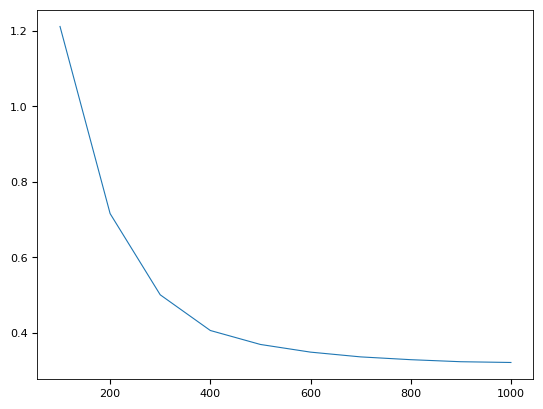

In [52]:
plt.plot(epochs, loss)

### Save Model

In [53]:
great.save("well")

### Load Model

In [14]:
# great = GReaT.load_from_dir("iris")

### Generate Samples

In [73]:
n_samples = 1000

In [59]:
samples = great.sample(n_samples, k=50,device="cpu")

145it [00:05, 26.12it/s]                        


In [56]:
samples.head()

,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90,POR_data
0,0.0,334.757,36.125,2.133,25.118,86.568,155.171,1.745,7.161,2.763,9.824,9.824,0.00001
1,1.0,310.302,31.019,2.448,25.131,75.019,180.896,1.856,3.016,2.824,3.320,3.320,0.00001
2,0.0,332.824,36.259,2.118,21.967,70.841,159.113,1.291,12.482,4.859,16.150,16.150,0.00001
3,0.0,329.152,36.259,2.146,21.649,54.568,161.780,1.973,5.729,3.142,11.017,11.017,29.60000
4,0.0,327.084,36.060,2.150,21.899,80.630,160.213,1.517,4.504,4.558,8.276,8.276,0.00001


In [60]:
samples.to_csv("/root/autodl-tmp/be_great-main/examples//GReaT_samples1_few.csv")

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [74]:
samples_custom = great.sample(n_samples, k=50, start_col="LABEL",
                              start_col_dist={"0": 0.15, "1": 0.85},device="cpu")

1021it [00:43, 23.22it/s]                         


In [75]:
samples_custom.head()
samples_custom.to_csv("/root/autodl-tmp/be_great-main/examples//GReaT_samples2.csv")